# Intoduction to SCikit Learn:

### What are we going to cover in this notebook?
0. An end-to-end Scikit-Learn worfklow
1. Getting the data ready
2. Choosing the right maching learning estimator/aglorithm/model for your problem
3. Fitting your chosen machine learning model to data and using it to make a prediction
4. Evaluting a machine learning model
5. Improving predictions through experimentation (hyperparameter tuning)
6. Saving and loading a pretrained model
7. Putting it all together in a pipeline

In [1]:
what_we_are_covering = [
'0. An end-to-end Scikit-Learn worfklow',
'1. Getting the data ready',
'2. Choosing the right maching learning estimator/aglorithm/model for your problem',
'3. Fitting your chosen machine learning model to data and using it to make a prediction',
'4. Evaluting a machine learning model',
'5. Improving predictions through experimentation (hyperparameter tuning)',
'6. Saving and loading a pretrained model',
'7. Putting it all together in a pipeline'
]

In [3]:
# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with machine learning

Three main things to do:

    1. Split the data into features and labels (Training, test sets - Usually X and y)
    2. Filling (Imputing) or disregarding missing values
    3. Converting non-numerical values into numerical values (Feature encoding)
    
Clean Data -----> Transform Data -----> Reduce Data

In [4]:
heart_disease_data = pd.read_csv("heart-disease.csv")
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
X = heart_disease_data.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
y = heart_disease_data.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [10]:
# 1. Split the data into training and test tests
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)


In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [12]:
X.shape

(303, 13)

### Making sure all the data is numerical

In [13]:
# Working with car_sales data since heart_disease data already has all the data in numericals

car_sales_data = pd.read_csv("car-sales-extended.csv")
car_sales_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [14]:
car_sales_data.shape

(1000, 5)

In [15]:
car_sales_data.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [16]:
# Split the data into X and y

X = car_sales_data.drop("Price", axis = 1)
y = car_sales_data.Price

In [17]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [18]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [19]:
# Splitting into train and test data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)

In [20]:
# Build ML model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

#### * ML model can't deal with strings. There comes the necessity of converting all the data into numericals.

# Turn the categories into numbers:

In [21]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_X  = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [22]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [24]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


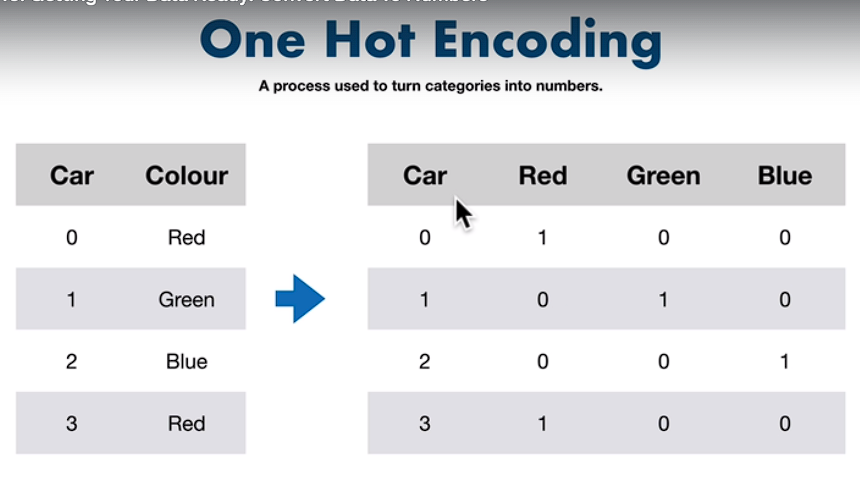

In [26]:
X.Make.value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [27]:
X.Colour.value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [28]:
X.Doors.value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [29]:
# Total 13 columns including Odometer

### One more way to convert categories into numericals


In [32]:
dummies = pd.get_dummies(car_sales_data[["Make", "Colour", "Doors", "Odometer (KM)"]])
dummies.head()

,Doors,Odometer (KM),Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,35431,0,1,0,0,0,0,0,0,1
1,5,192714,1,0,0,0,0,1,0,0,0
2,4,84714,0,1,0,0,0,0,0,0,1
3,4,154365,0,0,0,1,0,0,0,0,1
4,3,181577,0,0,1,0,0,1,0,0,0


In [34]:
# Fit the model after conversion
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [35]:
model.score(X_test, y_test)

0.3235867221569877

# Handling Missing values: